In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import empymod

sys.path.append('../')
import emulatte.forward as fwd
import ex1dem.w1dem as w1dem

In [59]:
# ユーザー定義 ndarray, list, tupleでの入力が可能
thicks = [1500, 2000, 100]
res = [2e14, 0.33, 1, 1, 1]
sc = [(0, 0, 1400), (500, 0, 1400)]
rc = [1000, 0, 1500]
freqs = np.logspace(-2, 4, 101)

model = fwd.model(thicks)
model.set_properties(res=res)
GW = fwd.transmitter('GroundedWire', freqs, current=1, nsplit=100)
model.locate(GW, sc, rc)
ans, freqs = model.emulate(hankel_filter='key201')

In [60]:
thicks = [1500, 2000, 100]
res = [2e14, 0.33, 1, 1, 1]
depth = [0, *np.cumsum(thicks)]
src = [0, 500, 0, 0, 1400, 1400]
rec = [1000, 0, 1500, 0, 0]
hfilt = empymod.filters.key_201_2009()
inp = {
    'src' : src,
    'rec' : rec,
    'freqtime' : freqs,
    'depth' : depth,
    'res' : res,
    'srcpts' : 3,
    'htarg': {'dlf': hfilt, 'pts_per_dec': 0}
}

empans = empymod.bipole(**inp)


:: empymod END; runtime = 0:00:00.046132 :: 3 kernel call(s)



In [61]:
# ユーザー定義 ndarray, list, tupleでの入力が可能
thicks = [1500, 2000, 100]
res = np.array([0.33, 1, 1, 1])

tx = [0, 500]
ty = [0, 0]
tz = [1400, 1400]
rx = [1000]
ry = [0]
rz = [1500]
freqs = np.logspace(-2, 4, 101)
plot_number = len(freqs)
hankel_filter = 'key201'
fdtd = 1
dbdt = 1
ds = 500
current = 1

Fdem = w1dem.Fdem(rx, ry, rz, tx, ty, tz, res, thicks, hankel_filter, fdtd, dbdt, plot_number, freqs)
ans, arg = Fdem.grounded_wire(current)# ansは電磁場応答6成分が辞書型

ans_ex = ans['e_x'] # 辞書型ansの'e_x'成分を取り出す

In [62]:
emuans = ans['e_x']

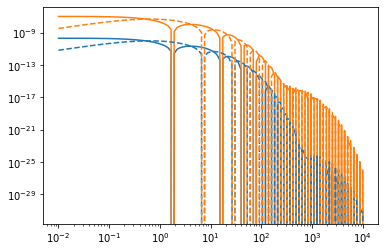

In [64]:
plt.plot(freqs, empans.real, 'C0')
plt.plot(freqs, emuans.real, 'C1')
plt.plot(freqs, -empans.real, 'C0')
plt.plot(freqs, -emuans.real, 'C1')

plt.plot(freqs, empans.imag, 'C0--')
plt.plot(freqs, emuans.imag, 'C1--')
plt.plot(freqs, -empans.imag, 'C0--')
plt.plot(freqs, -emuans.imag, 'C1--')

#plt.plot(freqs, ans_ex.real, 'C2')
#plt.plot(freqs, -ans_ex.real, 'C2')
#plt.plot(freqs, ans_ex.imag, 'C2--')
#plt.plot(freqs, -ans_ex.imag, 'C2--')
plt.xscale('log')
plt.yscale('log')

In [43]:
empans

EMArray([1.74719307e-10-6.71654343e-12j, 1.74654523e-10-7.00533655e-12j,
         1.74585569e-10-7.30581195e-12j, 1.74512192e-10-7.61839306e-12j,
         1.74434118e-10-7.94351540e-12j, 1.74351060e-10-8.28162671e-12j,
         1.74262716e-10-8.63318704e-12j, 1.74168761e-10-8.99866877e-12j,
         1.74068856e-10-9.37855663e-12j, 1.73962639e-10-9.77334771e-12j,
         1.73849727e-10-1.01835513e-11j, 1.73729715e-10-1.06096890e-11j,
         1.73602173e-10-1.10522940e-11j, 1.73466647e-10-1.15119116e-11j,
         1.73322655e-10-1.19890981e-11j, 1.73169686e-10-1.24844208e-11j,
         1.73007200e-10-1.29984574e-11j, 1.72834624e-10-1.35317953e-11j,
         1.72651350e-10-1.40850307e-11j, 1.72456736e-10-1.46587678e-11j,
         1.72250100e-10-1.52536175e-11j, 1.72030720e-10-1.58701964e-11j,
         1.71797833e-10-1.65091249e-11j, 1.71550628e-10-1.71710257e-11j,
         1.71288249e-10-1.78565214e-11j, 1.71009788e-10-1.85662328e-11j,
         1.70714285e-10-1.93007756e-11j, 1.70400726